**Alunos: 
Jefferson Costa, 
Sávio Berdine, 
Amanda Lasserre,
Kevin Andrews,
Nicholas Henrique.**

In [1]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("College.csv")
#No dataSet original, temos colunas com os nomes separados com um ".", por exemplo, Grad.Rate, e isso estava nos dando alguns problemas, então resolvemos renomear as colunas e trocar esse "." por um "_"
data = data.rename(columns={'Unnamed: 0':'College name','F.Undergrad':'F_Undergrad','P.Undergrad':'P_Undergrad','Room.Board':'Room_Board','S.F.Ratio':'S_F_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'})
data.head()

,College name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Os dados que serão utilizados**<br>
    **Private** A factor with levels No and Yes indicating private or public university     
    **Apps** Number of applications received     
    **Accept** Number of applications accepted     
    **Enroll Number** of new students enrolled     
    **Top10perc** Pct. new students from top 10% of H.S. class     
    **Top25perc** Pct. new students from top 25% of H.S. class     
    **F_Undergrad** Number of fulltime undergraduates     
    **P_Undergrad** Number of parttime undergraduates     
    **Outstate** Out-of-state tuition     
    **Room_Board** Room and board costs     
    **Books** Estimated book costs     
    **Personal** Estimated personal spending     
    **PhD Pct.** of faculty with Ph.D.’s     
    **Terminal Pct.** of faculty with terminal degree     
    **S_F_Ratio** Student/faculty ratio     
    **perc_alumni** Pct. alumni who donate     
    **Expend Instructional** expenditure per student     
    **Grad_Rate** Graduation rate<br>
**Observe que temos 18 variáveis**

### **Explorando o banco de dados**

**Uma comparação entre o número de estudantes "fulltime" e "parttime" de universidade privadas e universidades públicas.**

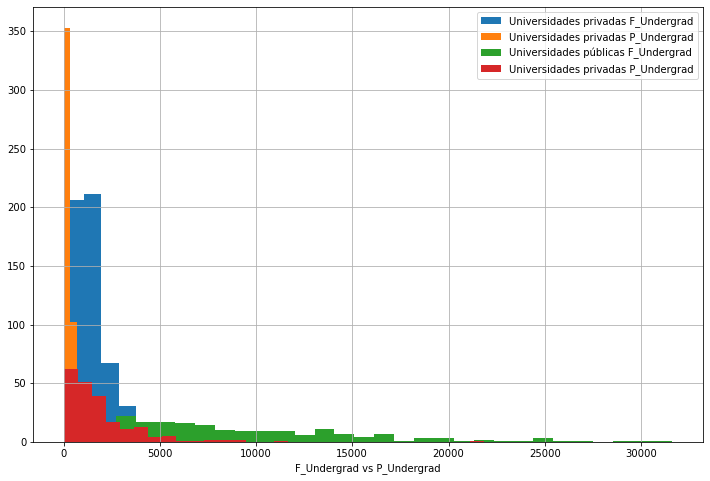

In [3]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'F_Undergrad'].hist(label="Universidades privadas F_Undergrad", bins=30)
data.loc[data.Private == 'Yes', 'P_Undergrad'].hist(label="Universidades privadas P_Undergrad", bins=30)
data.loc[data.Private == 'No', 'F_Undergrad'].hist(label="Universidades públicas F_Undergrad", bins=30)
data.loc[data.Private == 'No', 'P_Undergrad'].hist(label="Universidades privadas P_Undergrad", bins=30)

plt.xlabel('F_Undergrad vs P_Undergrad')
plt.legend()


In [4]:
result = data['Private'].value_counts()
print(result)

Yes    565
No     212
Name: Private, dtype: int64


**Uma comparação entre a taxa de graduação em universidades privadas e universidades públicas**

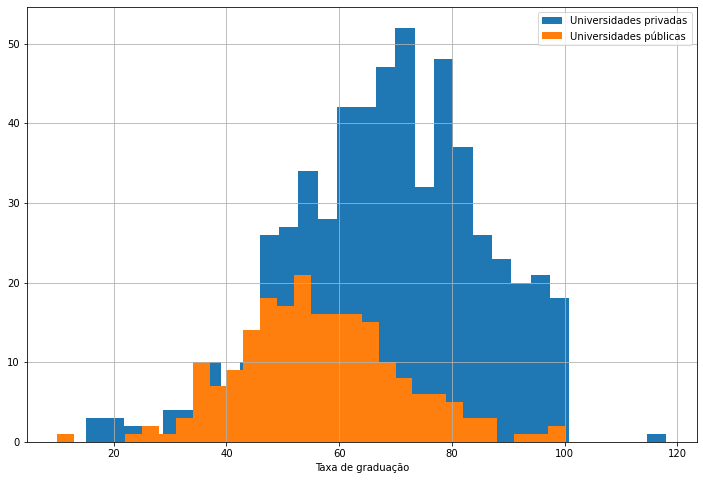

In [5]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Universidades privadas", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Universidades públicas", bins=30)

plt.xlabel('Taxa de graduação')
plt.legend()

Ao analisar o histograma, percebemos que tem uma universidade com uma taxa de graduação acima de 100%. Temos que saber qual é essa universidade e "setar" que a taxa de graduação é de 100%, pois isso faz mais sentido para nossa análise.


In [6]:
data.loc[data.Grad_Rate > 100]

,College name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Ao fazer a busca, temos que a *Cazenovia College* é a universidade pela qual estamos procurando, então iremos 'setar' a taxa de graduação dela pra 100%.


In [7]:
data.loc[data.Grad_Rate > 100, 'Grad_Rate'] = 100

**E agora faremos a comparação novamente**

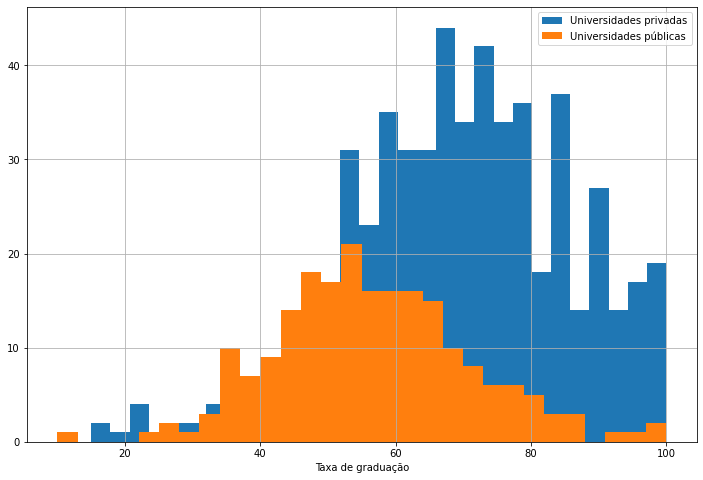

In [8]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Universidades privadas", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Universidades públicas", bins=30)

plt.xlabel('Taxa de graduação')
plt.legend()

In [9]:
#Transformando a columa em 1 pra yes e 0 pra no
data['Private'].replace(['Yes','No'],[1,0],inplace=True)

In [10]:
#selecionando apenas as colunas com valores numéricos
X = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values

**Criando uma instância do k-means com k = 2**

In [11]:
kmeans = KMeans(n_clusters = 2)
#ajustando o k-means
y_kmeans = kmeans.fit_predict(X)

In [12]:
print(classification_report(data.Private, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Com esssa primeira instância do K-means, com o K = 2, não obtivemos um resultado muito bom. Faremos outros experimentos, para verificar o que acontece com o *precision*, *recall* e *accuracy*.